In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

wine = pd.read_csv('winequality-red.csv')

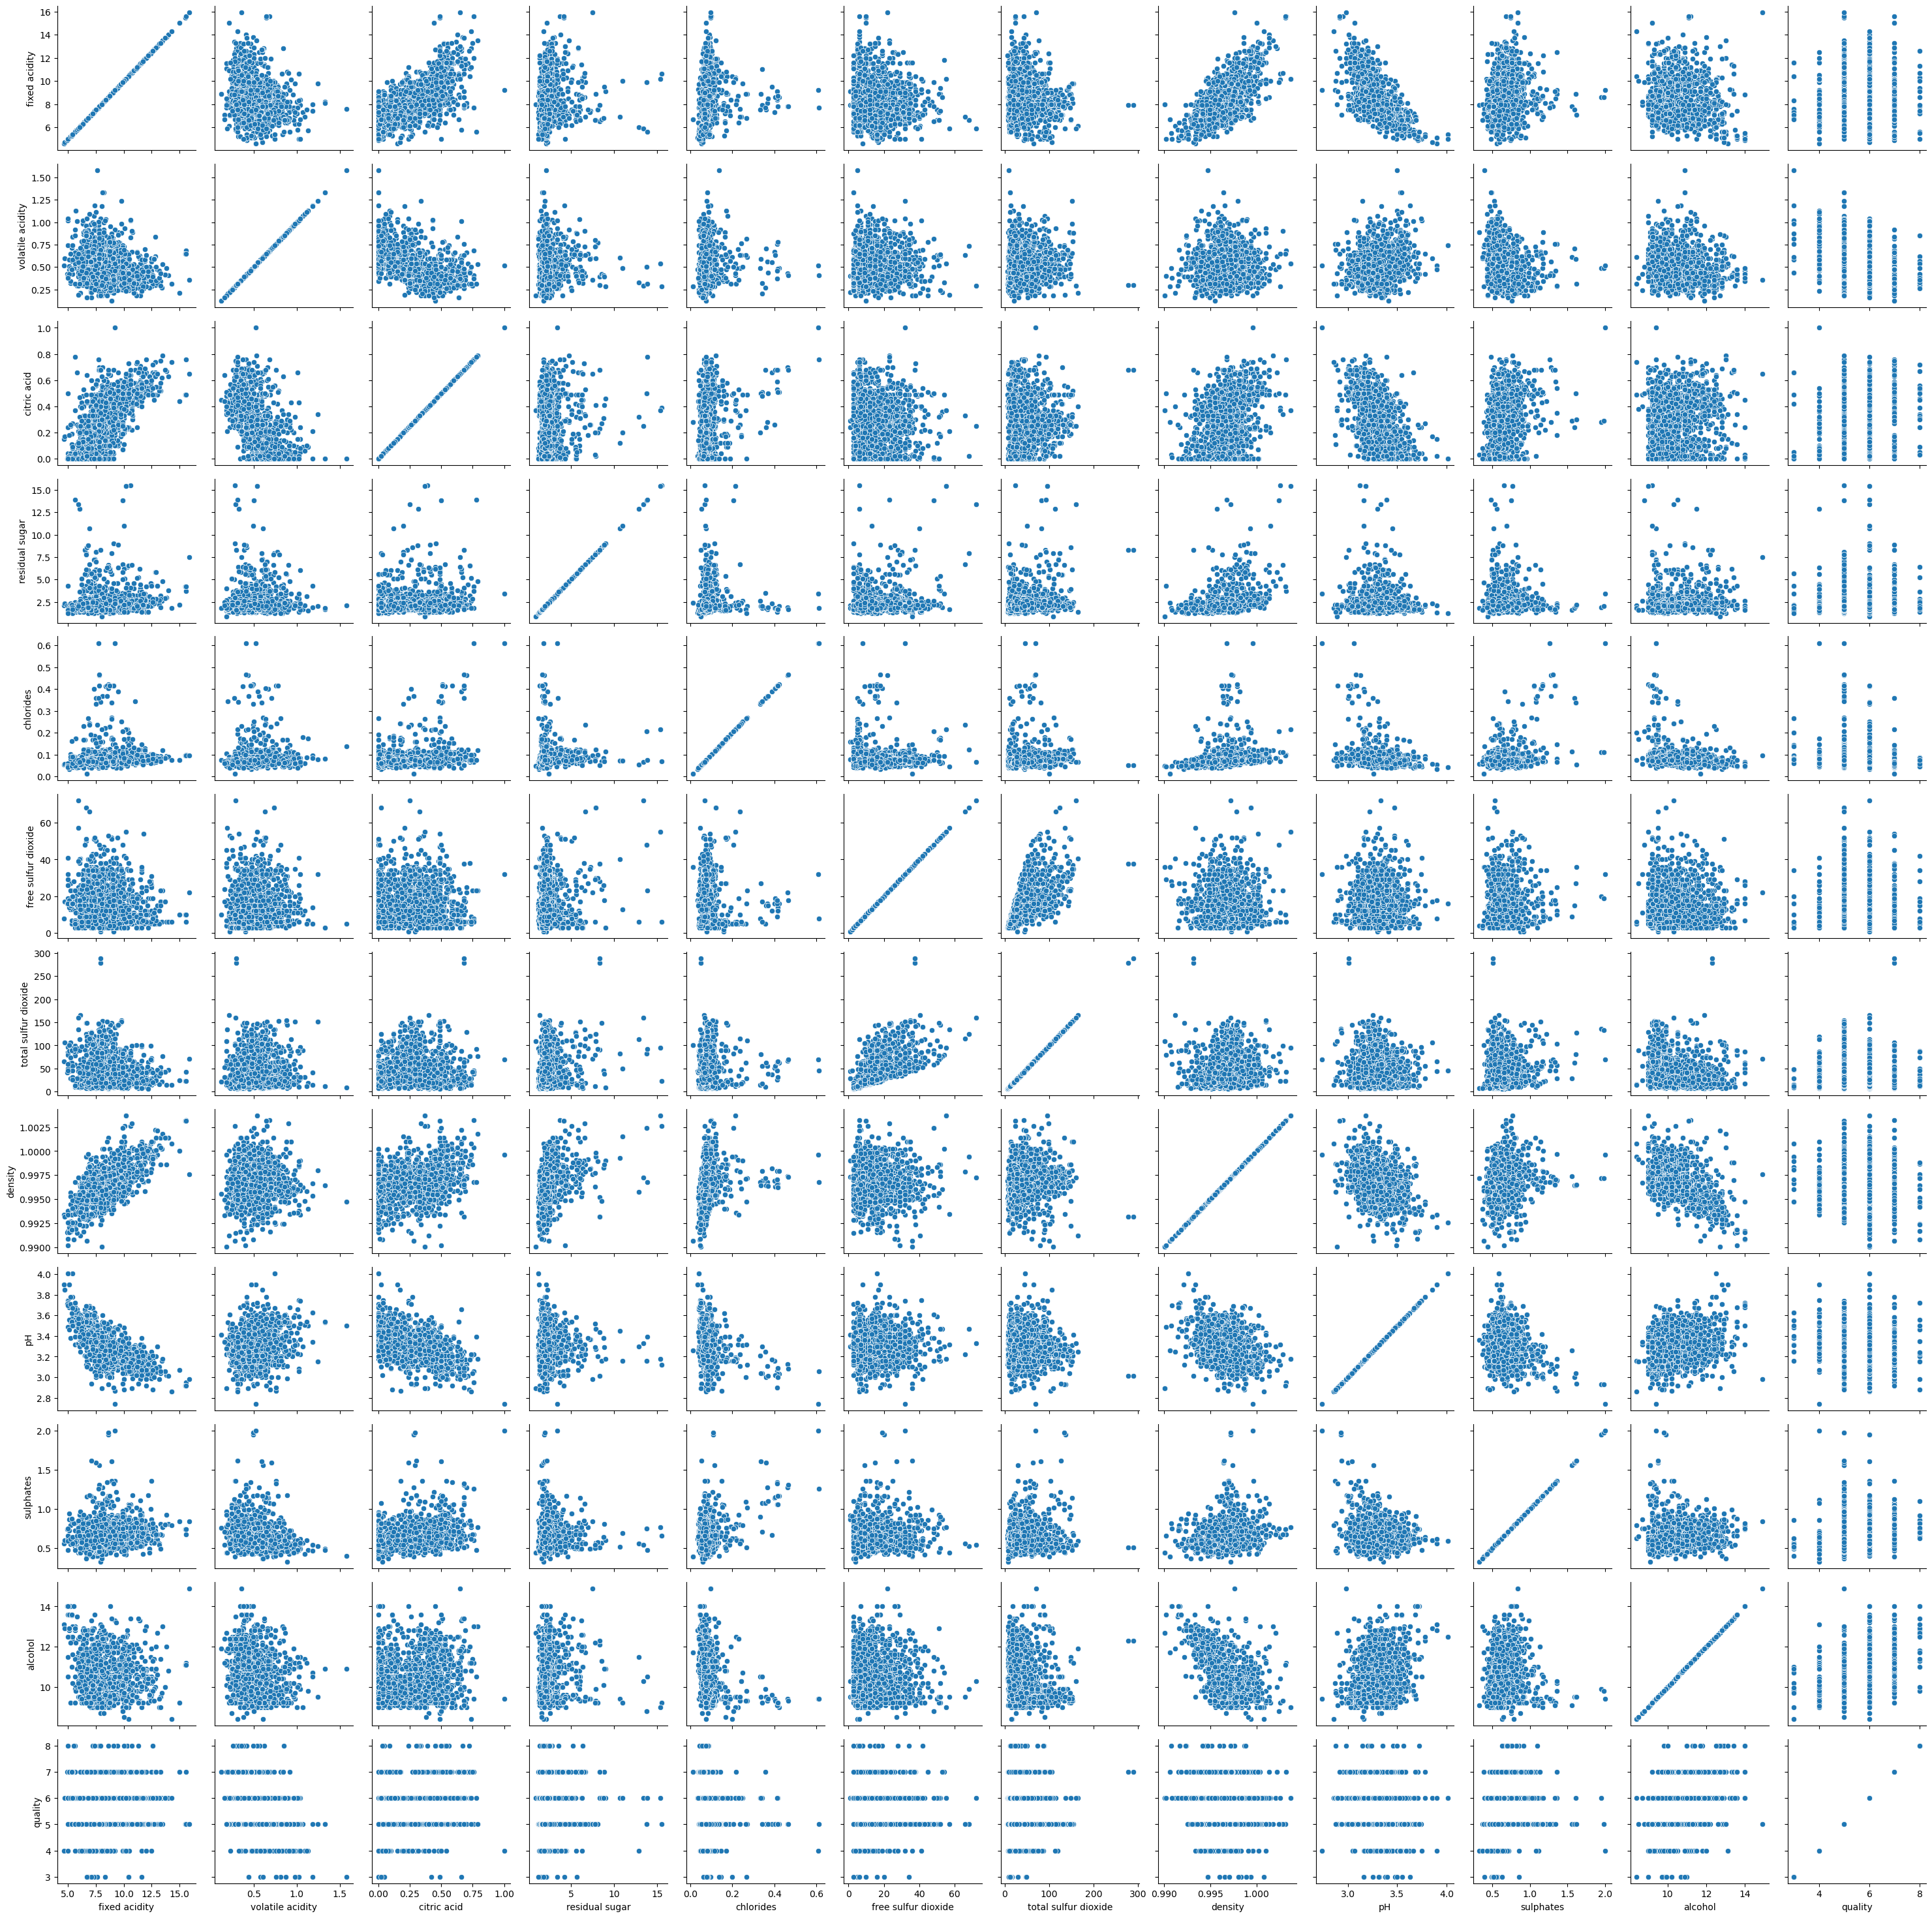

In [22]:
#let's display all the data, we want to compare wine properties to quality
g = sns.PairGrid(wine)
g.map(sns.scatterplot)
plt.show()

In [23]:
#if the wine has a quality higher than 6 then it is considered 'good' so onehotencode the quality, 1 means good, 0 means not good
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6.5, float('Inf')], labels = [0, 1])

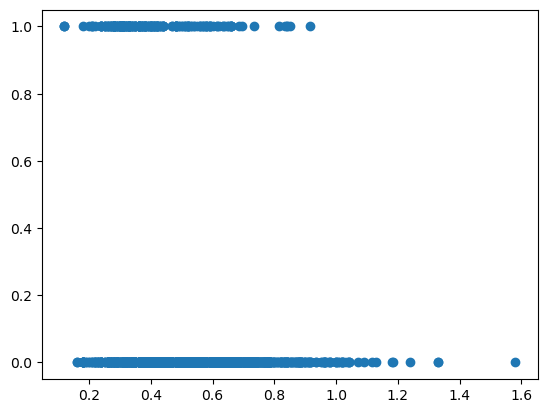

In [24]:
#display the onehotencoded data and compare it to volatile acidity. We notice that a higher volatile acidity seems to correspond to a poorer quality
quality = wine['quality']
volatile_acidity = wine['volatile acidity']
plt.scatter(volatile_acidity, quality)
plt.show()


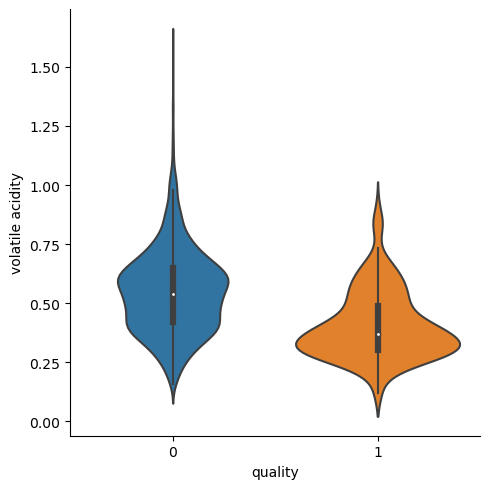

In [25]:
#let's display the data in a nicer violin plot, we can see that there seems to be some correlation between a lower volatile acidity and good wine.
sns.catplot(x = "quality", y = "volatile acidity",
            kind = "violin", data = wine)
plt.show()

In [36]:
#now let's train a model using all the features
from sklearn.model_selection import train_test_split

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = wine[features]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #create train and testing data using all features of dataset


In [37]:
#we can see that our precision for detecting poor quality wine is notably higher than for detecting good quality wine. The recall and f1-score for good quality wine is incredibly low.
#Therefore while the model can competently detect poor quality wine, it seems to be the case that detecting good quality wine based on the features provided is not possible
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print('Predicted labels: ', pred)
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       272
           1       0.73      0.23      0.35        48

    accuracy                           0.87       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.87      0.84       320

Predicted labels:  [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accu

In [38]:
#use confusion matrix, a large proportion of false positives to true positives giving a precision score of 0.73 as show in the classification report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[268,   4],
       [ 37,  11]], dtype=int64)

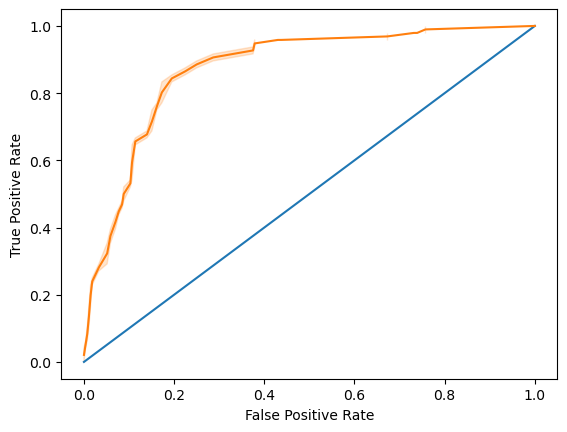

In [43]:
# visualise ROC curve (Receiving Operating Characteristic), we seem to consistently get false positives according to the ROC curve.
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

sns.lineplot(x = [0, 1], y = [0, 1])
ax = sns.lineplot(x = fpr, y = tpr)
ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
plt.show()

In [30]:
#Area Under the Curve (AUC), with an ideal area of 1 the AUC is not bad however the shape of the curve suggests consistent false positives.
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)
#end

0.8662714097496707
